In [20]:
#Importing needed libraries
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading data

loaded_data = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv',header = None)
loaded_data.head()

,0,1,2
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [3]:
loaded_data.columns = ['A', 'B', 'C']

In [5]:
#Exploratory Data Analysis
loaded_data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


In [6]:
loaded_data.isnull().values.any()

False

Text(0,0.5,'Values of C')

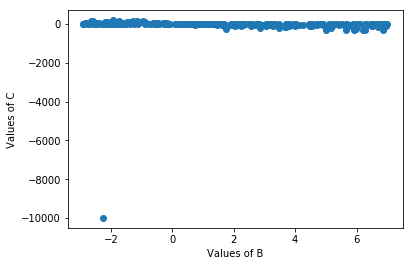

In [226]:
#From the summary statistics of the loaded data, we can see that column C has high standard deviation and also the mean 
#is also way too high. So we will try and get the distribution of data correct.


B = loaded_data.B.values
C = loaded_data.C.values

plt.scatter(B, C)
plt.xlabel("Values of B")
plt.ylabel("Values of C")


In [15]:
#Clearly from the above plot, we can see only one point being outlier. We wish to eliminate that row from the dataframe

In [16]:
clean_loaded_data = loaded_data[loaded_data['C'] != loaded_data['C'].min()]

In [19]:
clean_loaded_data.shape


(299, 3)

We are asked to build a regression model which explains column C by a function of A and B.

This can be looked at as, the value of C in each row in dataframe is generated by some mathematical amputations of A and B.
So, we can write a generic equation in the form of $$K = aX + bY + c$$ Here K = column C, X = column A and Y = column B and a, b, c are the other variants that lead to C using A and B. So, we consider the below equation for the regression to be solved -

$$C = \alpha_0 + \alpha_1 A + \alpha_2 B$$
Since, we have the values of C, A, B as columns in dataframe, we convert them into arrays and so we need the below representation to build the regression model -

$$ \alpha = [\alpha_0, \alpha_1, \alpha2]$$$$X = [1, A, B]$$
So, we can write in short - $$Y = \alpha ^ T X $$
Thus, the cost function we want to minimize will be

$$L(\alpha) = \frac{1}{2n} \sum_{i=1}^n(\alpha^T x^{(i)}-y^{(i)})^2$$


Now, to perform gradient descent to calculate the gradients for the regression line, we take the derivative of the loss function to update the values of alpha. For this, we need partial differential of loss with respect to alpha which is equal to $$\frac{\partial L}{\partial \alpha} = \eta /n * (\alpha^T X - y)X $$ which we will use in the array form and so we can see such equation below in the train() function while updating the alpha. Note : $\eta$ here is the learning rate.


In [213]:
def Loss(X,y,alpha):
    temp = np.dot(X,alpha.T)
    temp_L = np.power((temp-y),2)
    sum_L = np.sum(temp_L)
    L = np.log(sum_L/ ( 2*len(X)))
    
    return L

In [214]:
def train(X, y, alpha, num_iters, eta):
    loss = np.zeros(num_iters)
    for i in range(num_iters):
        temp = np.dot(X,alpha.T)
        alpha = alpha - (eta/len(X)) * np.sum(X * (X @ alpha.T - y), axis = 0)
        loss[i] = Loss(X,y, alpha)
    return loss, alpha

In [215]:
X = clean_loaded_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1]) 
X = np.concatenate((ones,X),axis=1)
y = clean_loaded_data.as_matrix(columns=clean_loaded_data.columns[2:])
alpha = np.zeros([1,3]) 

# set hyper_parameters - learning rate (eta) and number of iterations for training (num_iters)
eta = 0.008
num_iters = 2000 

C:\Users\heman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [216]:
loss, alpha = train(X, y , alpha, num_iters, eta)
print(alpha)

[[ -8.25911485  -7.77229685 -45.56754398]]


Text(0,0.5,'Loss')

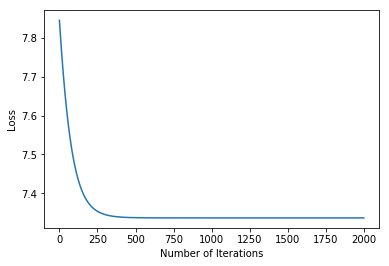

In [217]:
plt.plot(loss)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')

By observing the loss function (in log scale) and plot, we can understand that even though it seems like the loss is decreasing (which is what is our goal), it is becoming stagnant after some 250 iterations and not going towards zero. So, we must try to see what variations of A and B can be leveraged to build a regression model with the given data. It is always best to use the $R^2$ value along with the Root Mean Squared Error (RMSE) to understand how the model we built fits the data we have. 

The following functions helps us to calculate $R^2$ value and RMSE value using the predicted value (here, from the equation we wrote above $Y = \alpha ^ T X $) as we cannot use any external ML libraries - 

In [114]:
clean_loaded_data.iloc[0]

A     0.49
B    -0.18
C    11.50
Name: 0, dtype: float64

In [218]:
def r2_score_calc(y, y_pred):
    
    mean_y = np.mean(y)
    temp1 = y - y_pred
    A = sum(temp1 ** 2)
    temp2 = y - mean_y
    B = sum(temp2 ** 2)
    
    r2 = 1 - (A / B)
    return r2.item()

In [219]:
def rmse_calc(y, y_pred):
    temp = (y - y_pred)
    rmse = np.sqrt(sum(temp ** 2) / len(y))
    return rmse.item()

In [220]:
y_pred = X.dot(alpha.T)

r2 = r2_score_calc(y,y_pred)
rmse = rmse_calc(y,y_pred)

print('R2 =',r2)
print('RMSE =',rmse)

R2 = 0.39402221021317496
RMSE = 55.427287513350294


In [221]:
loss, alpha = train(X, y , alpha, num_iters, eta)
print(alpha)

[[ -8.25911572  -7.77235668 -45.56760402]]


In [222]:
y_pred = X.dot(alpha.T)

r2 = r2_score_calc(y,y_pred)
rmse = rmse_calc(y,y_pred)

print('R2 =',r2)
print('RMSE =',rmse)

R2 = 0.39402221021432293
RMSE = 55.42728751329779


Trying different polynomial versions of A and B to get high $R^2$ and low RMSE as they suggest better fit.


In [225]:

range1 = [1,2,3,4]
r2_a = 0
rmse_a = 1000
for i in range1:
    for j in range1:
        X = clean_loaded_data.iloc[:,0:2] 
        #Trying different powers of A and B
        X['A2'] = X['A']**i
        X['B2'] = X['B']**j 

        ones = np.ones([X.shape[0],1]) 
        X = np.concatenate((ones,X),axis=1) 
        alpha = np.zeros([1,5])
        
        #Updating alpha values using training
        loss, alpha = train(X, y , alpha, num_iters, eta)
        
        #making predictions based on updated alphas and input (X)
        y_pred = X.dot(alpha.T)
        
        #Calculating best r^2 and rmse scores
        r2 = r2_score_calc(y,y_pred)
        rmse = rmse_calc(y,y_pred)
        if r2 > r2_a:
            r2_a = r2
            k = i
            l = j
        if rmse < rmse_a:
            rmse_a = rmse
            k = i
            l = j
        
print("Best(Highest) R2:",r2_a, '\n', "Best (Lowest) RMSE:", rmse_a, '\n',"Best exponent of A:", k,'\n',"Best exponent of B:", l)

Best(Highest) R2: 0.4230408460509235 
 Best (Lowest) RMSE: 54.08387575586437 
 Best exponent of A: 2 
 Best exponent of B: 3


From above experiment it is better, if we have $$A^2 and B^3$$ included in the regression model. That gives us a better fit based on the given values